In [6]:
import qiskit
from qiskit import *
from qiskit.quantum_info import DensityMatrix 
from qiskit import QuantumCircuit, Aer, IBMQ, execute, transpile, assemble
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import visualize_transition, plot_bloch_multivector, \
plot_state_qsphere, plot_histogram, plot_state_city, plot_bloch_vector, plot_state_paulivec
from PIL import Image
%matplotlib inline

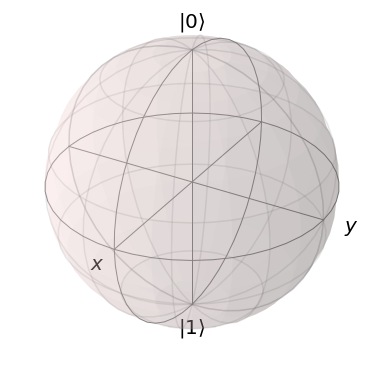

In [7]:
plot_bloch_vector([0,0,0])

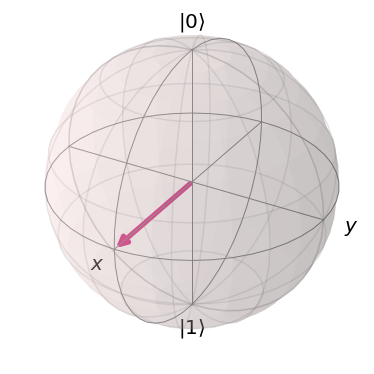

In [4]:
plot_bloch_vector([1,0,0])

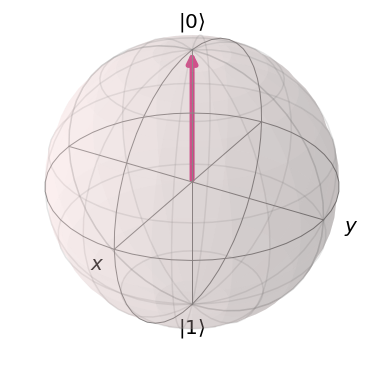

In [5]:
plot_bloch_vector([0,0,1])

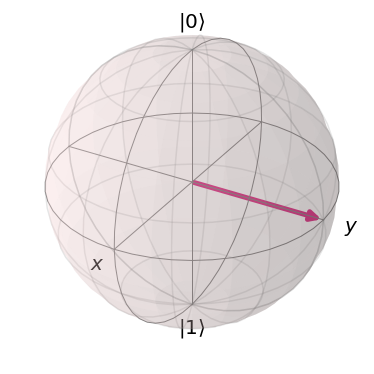

In [6]:
plot_bloch_vector([0,1,0])

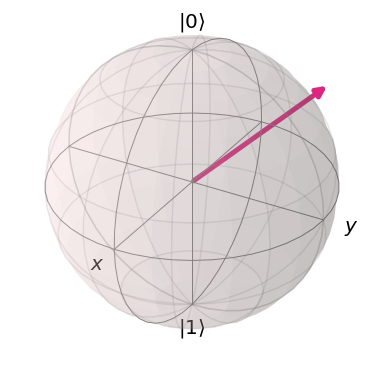

In [7]:
plot_bloch_vector([0,1,1])

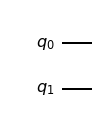

In [8]:
qc1 = QuantumCircuit(2)
qc1.draw(output='mpl')

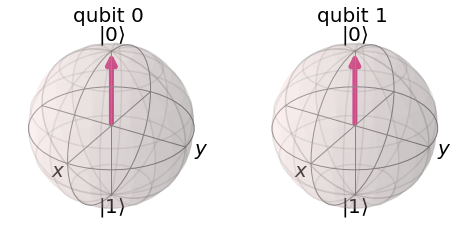

In [9]:
sv = Statevector.from_label('00')
sv = sv.evolve(qc1)
plot_bloch_multivector(sv.data)

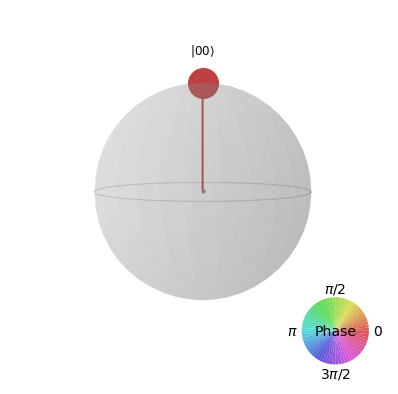

In [10]:
plot_state_qsphere(qc1.remove_final_measurements(inplace=False))

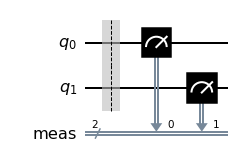

In [11]:
qc1.measure_all()
qc1.draw(output='mpl')

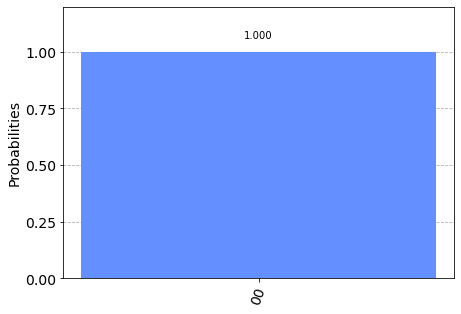

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc1, simulator).result()
counts = result.get_counts()
plot_histogram(counts)

In [13]:
qc2 = QuantumCircuit(1)
qc2.z(0)
qc2.draw(output='mpl')

qc2c = qc2

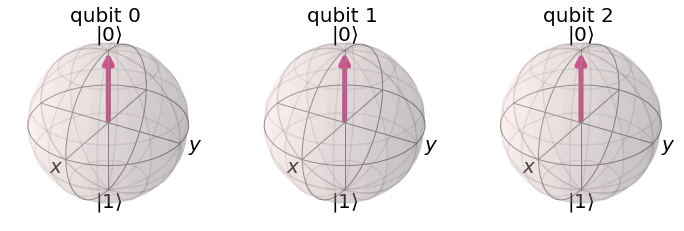

In [14]:
sv = Statevector.from_label('000')
sv = sv.evolve(qc2)
plot_bloch_multivector(sv.data)

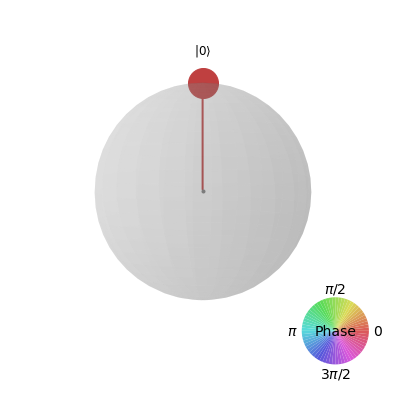

In [15]:
plot_state_qsphere(qc2)

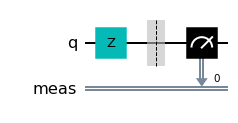

In [16]:
qc2.measure_all()
qc2.draw(output='mpl')

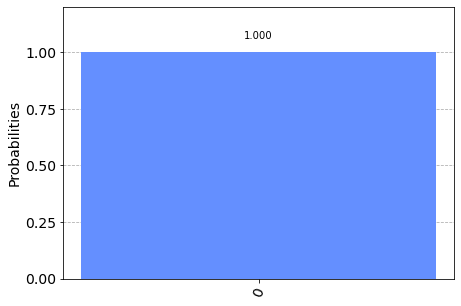

In [17]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc2, simulator).result()
counts = result.get_counts()
plot_histogram(counts)

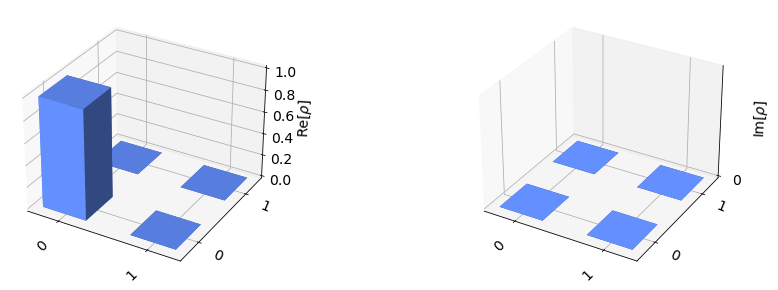

In [18]:
state = DensityMatrix.from_instruction(qc2c.remove_final_measurements(inplace=False))
plot_state_city(state)

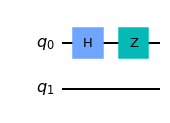

In [19]:
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.z(0)
qc3.draw(output='mpl')

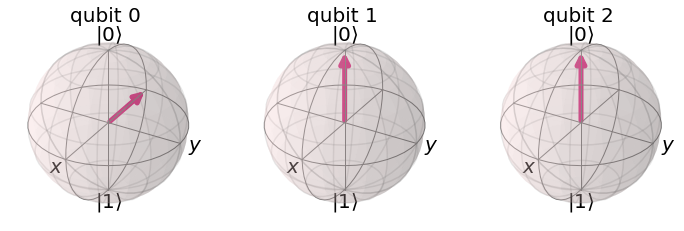

In [20]:
sv = Statevector.from_label('000')
sv = sv.evolve(qc3.remove_final_measurements(inplace=False))
plot_bloch_multivector(sv.data)

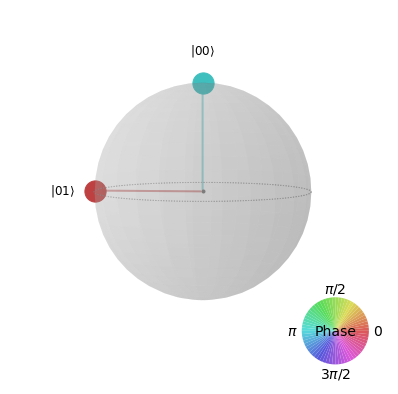

In [21]:
plot_state_qsphere(qc3)

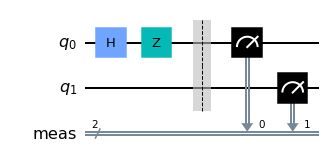

In [22]:
qc3.measure_all()
qc3.draw(output='mpl')

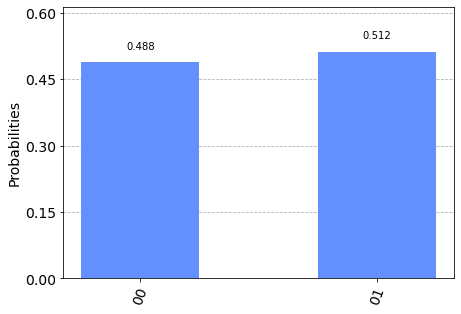

In [23]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3, simulator).result()
counts = result.get_counts()
plot_histogram(counts)

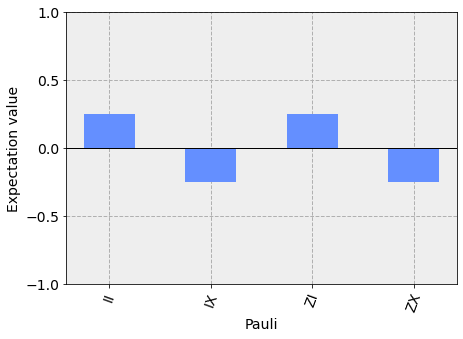

In [24]:
state = Statevector.from_instruction(qc3.remove_final_measurements(inplace=False))
plot_state_paulivec(state)

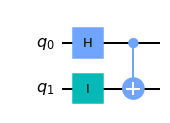

In [25]:
qc4 = QuantumCircuit(2)
qc4.h(0)
qc4.id(1)
qc4.cx(0, 1)
qc4.draw(output='mpl')

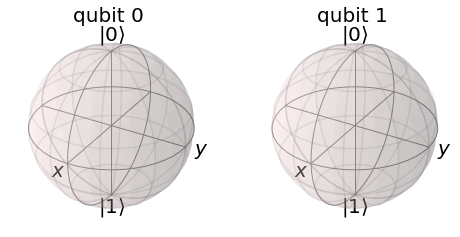

In [26]:
sv = Statevector.from_label('00')
sv = sv.evolve(qc4)
plot_bloch_multivector(sv.data)

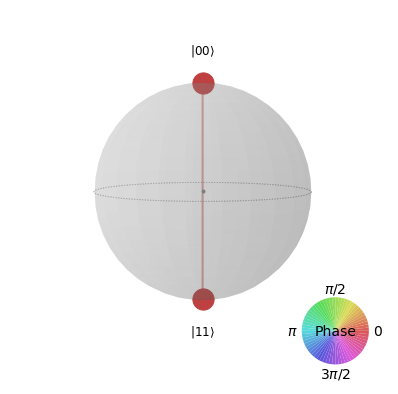

In [27]:
plot_state_qsphere(sv.data)

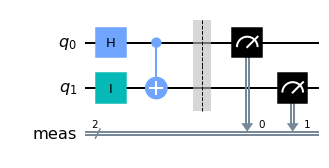

In [28]:
qc4.measure_all()
qc4.draw(output='mpl')

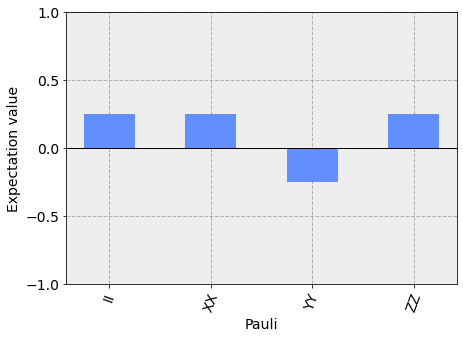

In [29]:
state = Statevector.from_instruction(qc4.remove_final_measurements(inplace=False))
plot_state_paulivec(state)

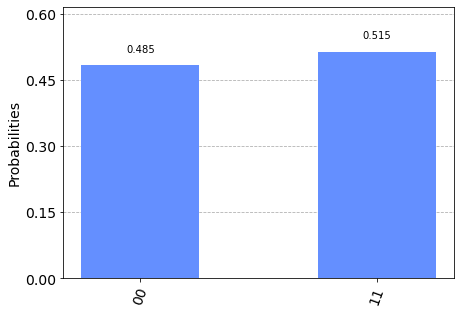

In [30]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc4, simulator).result()
counts = result.get_counts()
plot_histogram(counts)

In [31]:
from qiskit.test.mock import FakeAthens
athens = FakeAthens()

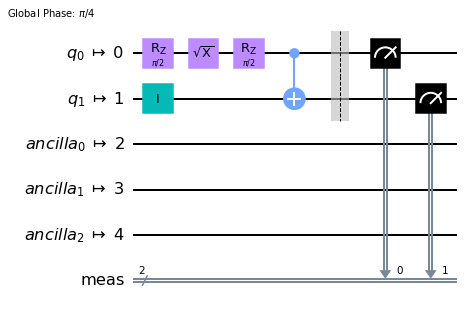

In [32]:
from qiskit import transpile
t_qc = transpile(qc4, athens)
t_qc.draw(output='mpl')

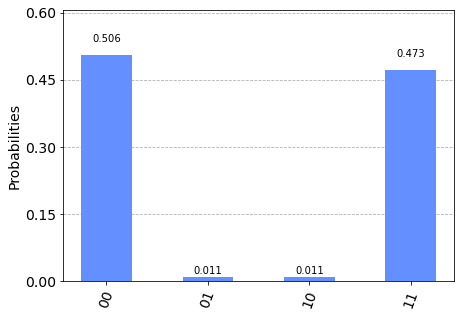

In [33]:
qobj = assemble(t_qc)
counts = athens.run(qobj).result().get_counts()
plot_histogram(counts)

In [13]:
qc5 = QuantumCircuit(1)
qc5.x(0)
# visualize_transition(qc5)

In [14]:
qc6 = QuantumCircuit(1)
qc6.z(0)
# visualize_transition(qc6)

In [15]:
qc7 = QuantumCircuit(1)
qc7.h(0)
# visualize_transition(qc7)